In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from hebbnets.networks import MultilayerDahEmbedding, MultilayerHahNetwork

In [2]:
data_X, data_Y = load_iris(return_X_y=True)

# Scale X
data_X -= np.mean(data_X, axis=0, keepdims=True)
data_X /= np.std(data_X, axis=0, keepdims=True)

In [3]:
input_layer_size = data_X.shape[1]
nodes_per_layer = [2]

hah_network = MultilayerHahNetwork(
    input_layer_size,
    nodes_per_layer,
    has_bias=False,
    act_type='linear',
)

dah_network = MultilayerDahEmbedding(
    input_layer_size,
    nodes_per_layer,
    has_bias=False,
    act_type='linear',
)

In [4]:
hah_network.train(
    data_X,
    num_epochs=25
)

In [5]:
dah_network.train(
    list(zip(data_X, data_Y)),
    num_epochs=25
)

## Plotting PCA vs Clustered scatter

<IPython.core.display.Javascript object>


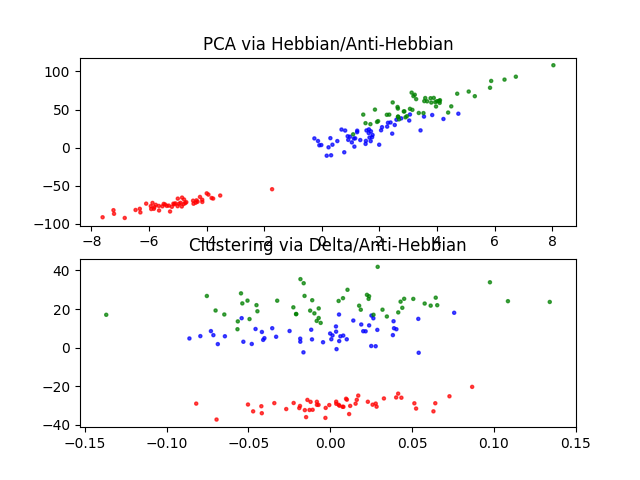

Text(0.5, 1.0, 'Clustering via Delta/Anti-Hebbian')

In [6]:
%matplotlib nbagg

def get_coords(model, input_data):
    coords = []
    for data in input_data:
        model.propogate_input(data)
        coords.append(model.layers[-1].activation)
    return list(zip(*coords))

color_dict = {0:'r', 1:'b', 2:'g'}
coord_colors = [color_dict[i] for i in data_Y]

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].scatter(
    *get_coords(hah_network, data_X),
    s=5, alpha=0.7,
    c=coord_colors
)
ax[0].set_title('PCA via Hebbian/Anti-Hebbian')

ax[1].scatter(
    *get_coords(dah_network, data_X),
    s=5, alpha=0.7,
    c=coord_colors
)
ax[1].set_title('Clustering via Delta/Anti-Hebbian')